# Social Network Analysis (SNA; 사회적 연결망 분석)
### by 우현우 Hyunwoo Woo (Hub1)
#### Dept. of Industrial Engineering, Yonsei Univ (Industrial Statistics Lab; ISL 산업통계연구실)
#### hw.woo@yonsei.ac.kr   (010 8966 5705)
#### blog: https://hub1.tistory.com
#### github repository: https://github.com/HyunwooWoo

##### ----------------------------------------------------------------------------------

## Easy Example

In [1]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


## 방향이 없는 네트워크

In [160]:
import networkx as nx
import matplotlib.pyplot as plt

# 방향이 없는 네트워크
G = nx.Graph()


# Node (vertex) 생성
Fruits = ['apple', 'banana', 'kiwi', 'mango']
G.add_nodes_from(Fruits)
# G.add_nodes_from([1, 2, 3, 4]) 처럼 숫자를 써도 ok
## List로 저장해야함


# Edge (link) 생성
relations = [('apple', 'banana'), ('kiwi', 'apple'), ('mango', 'apple'), ('mango', 'banana')]
G.add_edges_from(relations)
## 참고로, add_nodes_from()을 안 하고, add_edges_from()만 해도 네트워크가 형성이 됨

In [161]:
G.nodes

NodeView(('apple', 'banana', 'kiwi', 'mango'))

In [162]:
nx.number_of_nodes(G)

4

In [163]:
G.edges

EdgeView([('apple', 'banana'), ('apple', 'kiwi'), ('apple', 'mango'), ('banana', 'mango')])

In [164]:
nx.number_of_edges(G)

4

In [165]:
nx.to_numpy_matrix(G)

matrix([[0., 1., 1., 1.],
        [1., 0., 0., 1.],
        [1., 0., 0., 0.],
        [1., 1., 0., 0.]])

In [166]:
degree = nx.degree(G)
degree
# (특정 Node 번호, 특정 Node와 연결된 횟수)

DegreeView({'apple': 3, 'banana': 2, 'kiwi': 1, 'mango': 2})

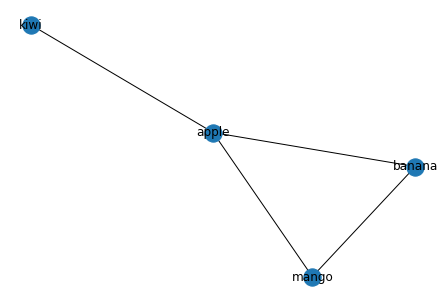

In [167]:
# 시각화
nx.draw(G, with_labels=True)
plt.show()

In [168]:
# Density (밀도)
nx.density(G)

0.6666666666666666

In [169]:
# Diameter
nx.diameter(G)

2

In [170]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 4
Number of edges: 4
Average degree:   2.0000


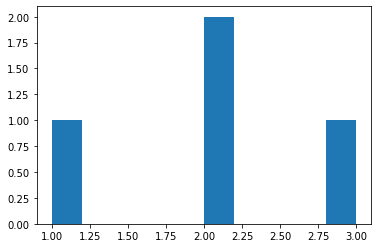

In [171]:
# Degree Distribution
import matplotlib.pyplot as plt
plt.figure()
plt.hist(dict(degree).values())
plt.show() # 위에서 degree = nx.degree(G)로 설정하였음

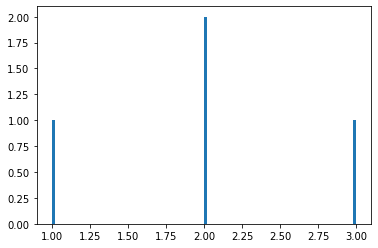

In [172]:
# Degree Distribution
import matplotlib.pyplot as plt
%matplotlib inline
h = plt.hist(dict(degree).values(), 100) # 위에서 degree = nx.degree(G)로 설정하였음

In [173]:
nx.degree_centrality(G)
# 연결 중심성
# 각각 N-1로 나눠서 Normalized degree centrality 의미
## 마당발이 누구인가? (직접적 이웃이 가장 많은가)

{'apple': 1.0,
 'banana': 0.6666666666666666,
 'kiwi': 0.3333333333333333,
 'mango': 0.6666666666666666}

In [174]:
nx.betweenness_centrality(G)
# 매개 중심성
# 각각 (N-1)(N-2)/2 로 나눠서 Normalized betweeness centrality 의미
## 얼마나 많은 최단 경로가 특정 노드를 지나는가? Broker 역할

{'apple': 0.6666666666666666, 'banana': 0.0, 'kiwi': 0.0, 'mango': 0.0}

In [175]:
nx.closeness_centrality(G)
# 근접 중심성
# 각각의 closeness값에 (N-1)을 곱해줘서 Normalized closness centrality 의미
## 누가 다른 노드들에 대한 최단거리를 가지는가? (다른 노드들에 가장 빨리 정보를 확산시킬 수 있는가?)

{'apple': 1.0, 'banana': 0.75, 'kiwi': 0.6, 'mango': 0.75}

In [176]:
nx.eigenvector_centrality(G)
# 고유벡터 중심성 (Bonanich power centrality)
## 누가 중요한 노드들과 연결이 많이 되어 있는가? (다른 노드들의 중심성centrality를 반영)

{'apple': 0.6116286437343044,
 'banana': 0.5227204550943347,
 'kiwi': 0.28184579793865716,
 'mango': 0.5227204550943347}

## 방향이 있는 네트워크

In [193]:
import networkx as nx
import matplotlib.pyplot as plt

# 방향이 있는 네트워크 생성
G = nx.DiGraph()

In [194]:
# Node (vertex) 생성
## List로 저장해야함
G.add_nodes_from([1, 2, 3, 4, 5])
# G.add_nodes_from(['A', 'B', 'C', 'D', 'E']) 처럼 문자를 써도 ok

# 아래의 방식으로도 가능
# Fruits = [1,2,3,4,5]
# G.add_nodes_from(Fruits)


# Edge (link) 생성
G.add_edges_from([(1, 2), (2, 1), (2, 3), (2,4), (4, 2), (1,5)])

# 아래의 방식으로도 가능
# relations = [(1, 2), (2, 1), (2, 3), (2,4), (4, 2), (1,5)]
# G.add_edges_from(relations)

In [195]:
G.nodes # 노드 확인

NodeView((1, 2, 3, 4, 5))

In [196]:
nx.number_of_nodes(G)

5

In [197]:
G.edges # 엣지 확인

OutEdgeView([(1, 2), (1, 5), (2, 1), (2, 3), (2, 4), (4, 2)])

In [198]:
nx.number_of_edges(G)

6

In [199]:
nx.to_numpy_matrix(G)

matrix([[0., 1., 0., 0., 1.],
        [1., 0., 1., 1., 0.],
        [0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [200]:
degree = nx.degree(G)
print(degree) # (특정 Node 번호, 특정 Node와 연결된 횟수)
# 이때, 횟수에는 방향성까지 고려해서 개수를 count한다.

## 아래의 코드를 이용하면 in, out 각각의 degree 도출 가능
# G.in_degree()
# G.in_degree()

[(1, 3), (2, 5), (3, 1), (4, 2), (5, 1)]


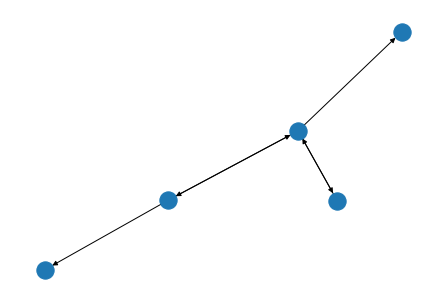

In [201]:
# 기본 시각화
nx.draw(G)
plt.show()

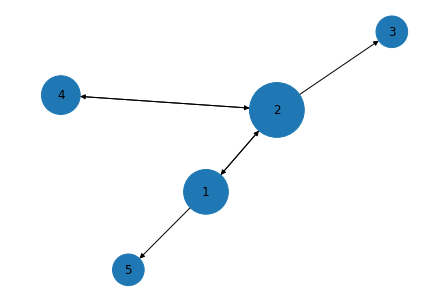

In [202]:
# 시각화 (degree가 클수록 원의 크기도 크도록)
nx.draw(G,node_size=[500 + v[1]*500 for v in degree], with_labels=True)

In [203]:
# Density (밀도)
nx.density(G)

0.3

In [206]:
nx.diameter(nx.to_undirected(G)) 
# directed graph에서는 이동에 있어서 양방향을 모두 따지기 때문에 그냥 nx.diameter(G)를 할 경우 오류 발생
# 이런 경우를 weakly connected graph라고 함 (directed graph에서)

3

In [207]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 5
Number of edges: 6
Average in degree:   1.2000
Average out degree:   1.2000


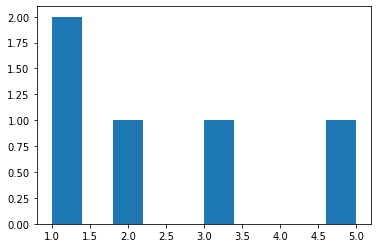

In [208]:
# Degree Distribution
import matplotlib.pyplot as plt
plt.figure()
plt.hist(dict(degree).values())
plt.show() # 위에서 degree = nx.degree(G)로 설정하였음

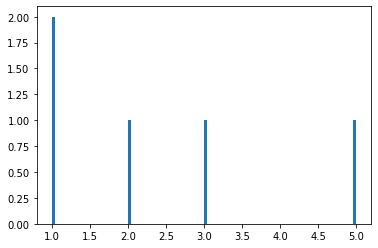

In [209]:
# Degree Distribution
import matplotlib.pyplot as plt
%matplotlib inline
h = plt.hist(dict(degree).values(), 100) # 위에서 degree = nx.degree(G)로 설정하였음

In [210]:
print('degree centrality')
print(nx.degree_centrality(G))
print('--------------------')
print('betweenness centrality')
print(nx.betweenness_centrality(G))
print('--------------------')
print('closeness centrality')
print(nx.closeness_centrality(G))
print('--------------------')
print('eigenvector centrality')
print(nx.eigenvector_centrality(G))

degree centrality
{1: 0.75, 2: 1.25, 3: 0.25, 4: 0.5, 5: 0.25}
--------------------
betweenness centrality
{1: 0.16666666666666666, 2: 0.41666666666666663, 3: 0.0, 4: 0.0, 5: 0.0}
--------------------
closeness centrality
{1: 0.3333333333333333, 2: 0.5, 3: 0.44999999999999996, 4: 0.3333333333333333, 5: 0.375}
--------------------
eigenvector centrality
{1: 0.4264012921655989, 2: 0.603022490390039, 3: 0.4264012921655989, 4: 0.4264012921655989, 5: 0.3015123383915127}


## 속성 (attribute)을 부여해볼까?

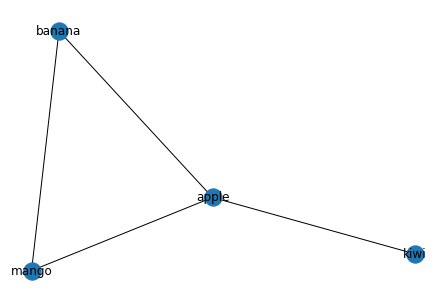

In [251]:
# 기본 setting

G = nx.Graph()
# Node (vertex) 생성
Fruits = ['apple', 'banana', 'kiwi', 'mango']
G.add_nodes_from(Fruits)

# Edge (link) 생성
relations = [('apple', 'banana'), ('kiwi', 'apple'), ('mango', 'apple'), ('mango', 'banana')]
G.add_edges_from(relations)

nx.draw(G, with_labels=True)
plt.show()

Node에 속성 부여

In [252]:
G.nodes['kiwi'] # 속성 부여 전

{}

In [253]:
G.nodes['kiwi']['kind'] = 'fruit'
G.nodes['kiwi'] # 속성 부여 후

{'kind': 'fruit'}

In [254]:
G.nodes()

NodeView(('apple', 'banana', 'kiwi', 'mango'))

In [255]:
G.nodes(data=True)

NodeDataView({'apple': {}, 'banana': {}, 'kiwi': {'kind': 'fruit'}, 'mango': {}})

In [256]:
Fruits = ['apple', 'banana', 'kiwi', 'mango']
G.add_nodes_from(Fruits, kind='fruit')

In [257]:
G.nodes(data=True)

NodeDataView({'apple': {'kind': 'fruit'}, 'banana': {'kind': 'fruit'}, 'kiwi': {'kind': 'fruit'}, 'mango': {'kind': 'fruit'}})

Edge에 속성 부여

In [258]:
G.edges()

EdgeView([('apple', 'banana'), ('apple', 'kiwi'), ('apple', 'mango'), ('banana', 'mango')])

In [259]:
G.edges(data=True)

EdgeDataView([('apple', 'banana', {}), ('apple', 'kiwi', {}), ('apple', 'mango', {}), ('banana', 'mango', {})])

In [260]:
G.add_edges_from(relations, weight=1)

In [261]:
G.edges(data=True)

EdgeDataView([('apple', 'banana', {'weight': 1}), ('apple', 'kiwi', {'weight': 1}), ('apple', 'mango', {'weight': 1}), ('banana', 'mango', {'weight': 1})])

In [262]:
G['apple']['banana']['weight']=5
G['apple']['kiwi']['weight']=2
G['apple']['mango']['weight']=3
G['banana']['mango']['weight']=4

In [ ]:
# 각각 아래와 같이 edge에 weight를 부여할 수도 있음
## G = nx.Graph() 
## E = [('A', 'B', 2), ('A', 'C', 1), ('B', 'D', 5), ('B', 'E', 3), ('C', 'E', 2)] # edge를 애초에 이렇게 weight 넣어서 생성
## G.add_weighted_edges_from(E)

In [263]:
G.edges(data=True)

EdgeDataView([('apple', 'banana', {'weight': 5}), ('apple', 'kiwi', {'weight': 2}), ('apple', 'mango', {'weight': 3}), ('banana', 'mango', {'weight': 4})])

In [264]:
nx.to_numpy_matrix(G)

matrix([[0., 5., 2., 3.],
        [5., 0., 0., 4.],
        [2., 0., 0., 0.],
        [3., 4., 0., 0.]])

In [265]:
G.degree()

DegreeView({'apple': 3, 'banana': 2, 'kiwi': 1, 'mango': 2})

In [266]:
nx.density(G)

0.6666666666666666

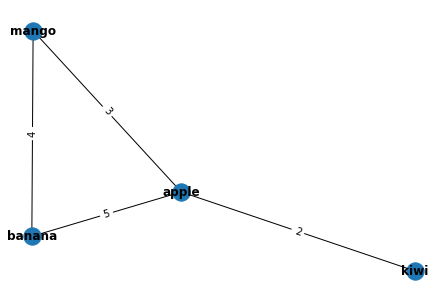

In [267]:
# 가중치 고려 시각화1
pos=nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight= 'bold')
edge_weight = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
plt.show()

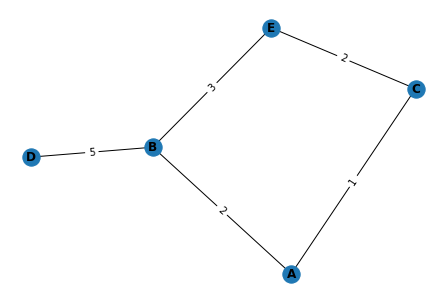

In [268]:
# 가중치 고려 시각화2
G = nx.Graph() 
E = [('A', 'B', 2), ('A', 'C', 1), ('B', 'D', 5), ('B', 'E', 3), ('C', 'E', 2)] # edge를 애초에 이렇게 weight 넣어서 생성
G.add_weighted_edges_from(E)

pos=nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight= 'bold')
edge_weight = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
plt.show()

## Practice with data

In [17]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import os 

In [269]:
import pandas as pd 
data = pd.read_csv('asoiaf-all-edges.csv')

In [270]:
data

,Source,Target,Type,id,weight
0,Addam-Marbrand,Brynden-Tully,Undirected,0,3
1,Addam-Marbrand,Cersei-Lannister,Undirected,1,3
2,Addam-Marbrand,Gyles-Rosby,Undirected,2,3
3,Addam-Marbrand,Jaime-Lannister,Undirected,3,14
4,Addam-Marbrand,Jalabhar-Xho,Undirected,4,3
...,...,...,...,...,...
2818,Walder-Frey-(son-of-Merrett),Wex-Pyke,Undirected,2818,4
2819,Waymar-Royce,Will-(prologue),Undirected,2819,18
2820,Weasel,Weese,Undirected,2820,6
2821,Woth,Yoren,Undirected,2821,4


In [281]:
df = data.copy()[['Source', 'Target', 'weight']]
# 그냥 data[['Source', 'Target', 'weight']]를 해도 되지만, 그럴 경우 다음에 df.drop_duplicates에서 warnings가 뜬다.
# Python 자체에서 복사본만 수정할지, 원본도 수정할지 알 수가 없어서 경고를 보내는 것임.

In [282]:
df

,Source,Target,weight
0,Addam-Marbrand,Brynden-Tully,3
1,Addam-Marbrand,Cersei-Lannister,3
2,Addam-Marbrand,Gyles-Rosby,3
3,Addam-Marbrand,Jaime-Lannister,14
4,Addam-Marbrand,Jalabhar-Xho,3
...,...,...,...
2818,Walder-Frey-(son-of-Merrett),Wex-Pyke,4
2819,Waymar-Royce,Will-(prologue),18
2820,Weasel,Weese,6
2821,Woth,Yoren,4


In [283]:
df.drop_duplicates(subset=['Source', 'Target', 'weight'], inplace=True) #겹치는 데이터 삭제

In [284]:
df

,Source,Target,weight
0,Addam-Marbrand,Brynden-Tully,3
1,Addam-Marbrand,Cersei-Lannister,3
2,Addam-Marbrand,Gyles-Rosby,3
3,Addam-Marbrand,Jaime-Lannister,14
4,Addam-Marbrand,Jalabhar-Xho,3
...,...,...,...
2818,Walder-Frey-(son-of-Merrett),Wex-Pyke,4
2819,Waymar-Royce,Will-(prologue),18
2820,Weasel,Weese,6
2821,Woth,Yoren,4


In [286]:
G = nx.from_pandas_edgelist(df,  source='Source', target='Target', edge_attr='weight')

# 만약 directed graph라면, create_using=nx.DiGraph()을 아래와 같이 추가
## G = nx.from_pandas_edgelist(df,  source='Source', target='Target', edge_attr='weight', create_using=nx.DiGraph())

- Node: 왕좌의게임의 인물
- Edge: 인물들간의 친밀도

In [287]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 796
Number of edges: 2823
Average degree:   7.0930


In [314]:
G.nodes # 노드 확인

NodeView(('Addam-Marbrand', 'Brynden-Tully', 'Cersei-Lannister', 'Gyles-Rosby', 'Jaime-Lannister', 'Jalabhar-Xho', 'Joffrey-Baratheon', 'Kevan-Lannister', 'Lyle-Crakehall', 'Oberyn-Martell', 'Tyrion-Lannister', 'Tywin-Lannister', 'Varys', 'Aegon-Frey-(son-of-Stevron)', 'Catelyn-Stark', 'Robb-Stark', 'Stevron-Frey', 'Walder-Frey', 'Aegon-I-Targaryen', 'Daenerys-Targaryen', 'Eddard-Stark', 'Harren-Hoare', 'Nan', 'Rhaenys-Targaryen', 'Stannis-Baratheon', 'Torrhen-Stark', 'Visenya-Targaryen', 'Aegon-Targaryen-(son-of-Rhaegar)', 'Elia-Martell', 'Franklyn-Flowers', 'Haldon', 'Harry-Strickland', 'Jon-Connington', 'Lemore', 'Rhaegar-Targaryen', 'Rhaenys-Targaryen-(daughter-of-Rhaegar)', 'Rolly-Duckfield', 'Viserys-Targaryen', 'Yandry', 'Ysilla', 'Aegon-V-Targaryen', 'Aemon-Targaryen-(Maester-Aemon)', 'Aemon-Targaryen-(Dragonknight)', 'Alleras', 'Alliser-Thorne', 'Bowen-Marsh', 'Chett', 'Clydas', 'Cotter-Pyke', 'Daeron-II-Targaryen', 'Dareon', 'Denys-Mallister', 'Donal-Noye', 'Eddison-Tollett',

In [289]:
G.edges # 엣지 확인

EdgeView([('Addam-Marbrand', 'Brynden-Tully'), ('Addam-Marbrand', 'Cersei-Lannister'), ('Addam-Marbrand', 'Gyles-Rosby'), ('Addam-Marbrand', 'Jaime-Lannister'), ('Addam-Marbrand', 'Jalabhar-Xho'), ('Addam-Marbrand', 'Joffrey-Baratheon'), ('Addam-Marbrand', 'Kevan-Lannister'), ('Addam-Marbrand', 'Lyle-Crakehall'), ('Addam-Marbrand', 'Oberyn-Martell'), ('Addam-Marbrand', 'Tyrion-Lannister'), ('Addam-Marbrand', 'Tywin-Lannister'), ('Addam-Marbrand', 'Varys'), ('Brynden-Tully', 'Arya-Stark'), ('Brynden-Tully', 'Catelyn-Stark'), ('Brynden-Tully', 'Daven-Lannister'), ('Brynden-Tully', 'Edmure-Tully'), ('Brynden-Tully', 'Edwyn-Frey'), ('Brynden-Tully', 'Emmon-Frey'), ('Brynden-Tully', 'Hoster-Tully'), ('Brynden-Tully', 'Jaime-Lannister'), ('Brynden-Tully', 'Lyle-Crakehall'), ('Brynden-Tully', 'Lysa-Arryn'), ('Brynden-Tully', 'Nestor-Royce'), ('Brynden-Tully', 'Rickard-Karstark'), ('Brynden-Tully', 'Robb-Stark'), ('Brynden-Tully', 'Ryman-Frey'), ('Brynden-Tully', 'Theon-Greyjoy'), ('Brynden-Tu

In [291]:
print("diamter")
print(nx.diameter(G))
print("---------------")
print("density")
print(nx.density(G))

diamter
9
---------------
density
0.008921968332227173


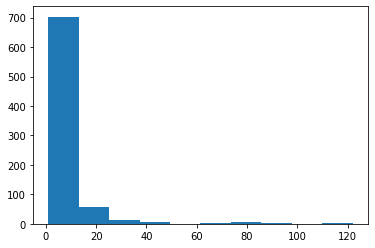

In [293]:
# Degree Distribution 시각화1
import matplotlib.pyplot as plt
degree = nx.degree(G)

plt.figure()
plt.hist(dict(degree).values())
plt.show() # 위에서 degree = nx.degree(G)로 설정하였음

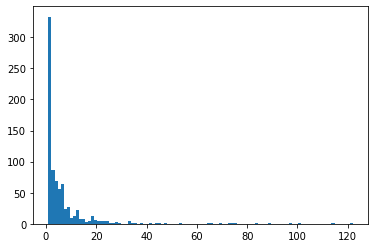

In [294]:
# Degree Distribution 시각화2
import matplotlib.pyplot as plt
%matplotlib inline
h = plt.hist(dict(degree).values(), 100) # 위에서 degree = nx.degree(G)로 설정하였음

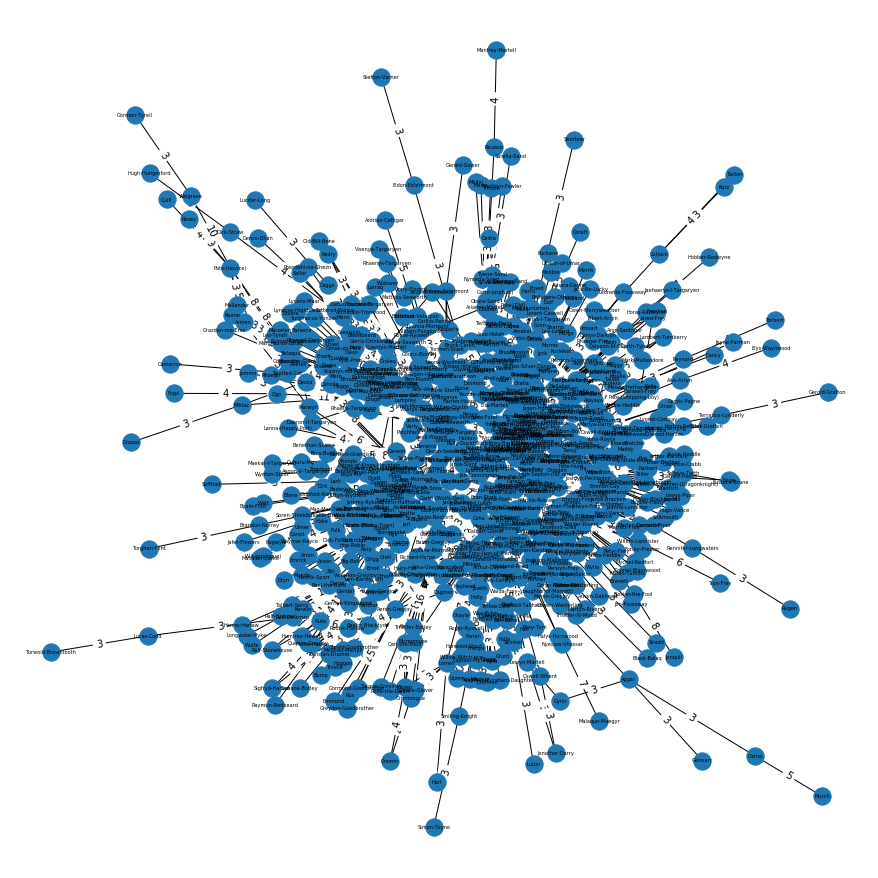

In [311]:
# 시각화 1
plt.figure(figsize=(12,12)) # 이미지가 작을 수 있으니, 충분히 키우는 것을 권장

pos=nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_size = 5)
edge_weight = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight, with_labels=True)
plt.show()

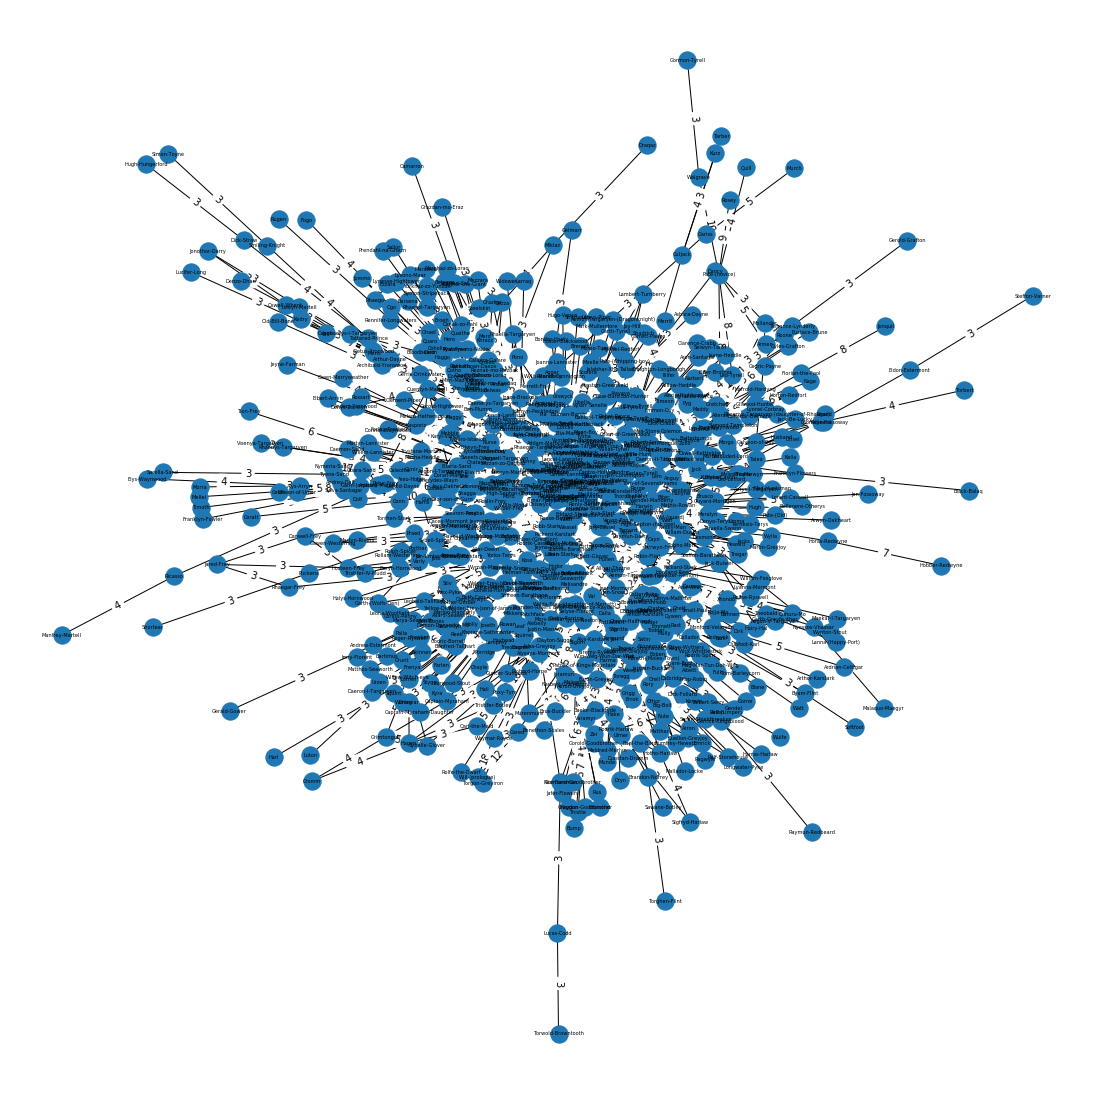

In [312]:
# 시각화 2 (degree가 클수록 원의 크기도 크도록)
plt.figure(figsize=(15,15)) # 이미지가 작을 수 있으니, 충분히 키우는 것을 권장

pos=nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_size = 5)
edge_weight = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight, node_size=[5 + v[1]*5 for v in degree], with_labels=True)
plt.show()

In [297]:
deg_cen = nx.degree_centrality(G)
bet_cen = nx.betweenness_centrality(G)
clo_cen = nx.closeness_centrality(G)
eig_cen = nx.eigenvector_centrality(G)

In [300]:
# 각각에 대한 Top 3
print('degree centrality')
print(sorted(deg_cen.items(), key=lambda x:x[1], reverse=True)[0:3])
print('--------------------')
print('betweenness centrality')
print(sorted(bet_cen.items(), key=lambda x:x[1], reverse=True)[0:3])
print('--------------------')
print('closeness centrality')
print(sorted(clo_cen.items(), key=lambda x:x[1], reverse=True)[0:3])
print('--------------------')
print('eigenvector centrality')
print(sorted(eig_cen.items(), key=lambda x:x[1], reverse=True)[0:3])

degree centrality
[('Tyrion-Lannister', 0.15345911949685534), ('Jon-Snow', 0.14339622641509434), ('Jaime-Lannister', 0.1270440251572327)]
--------------------
betweenness centrality
[('Jon-Snow', 0.1921196196835449), ('Tyrion-Lannister', 0.1621910961115984), ('Daenerys-Targaryen', 0.11841801916269204)]
--------------------
closeness centrality
[('Tyrion-Lannister', 0.4763331336129419), ('Robert-Baratheon', 0.4592720970537262), ('Eddard-Stark', 0.455848623853211)]
--------------------
eigenvector centrality
[('Tyrion-Lannister', 0.25155836369082013), ('Cersei-Lannister', 0.2357712102434478), ('Jaime-Lannister', 0.2263385016604407)]


참고:

https://pbj0812.tistory.com/228

https://www.slideshare.net/koorukuroo/20140830-pycon2014-networkx

https://blog.daum.net/geoscience/1408

https://bab2min.tistory.com/554

https://smlee729.github.io/python/network%20analysis/2015/04/13/1-degree-centrality.html

https://stackoverflow.com/questions/33114746/why-does-networkx-say-my-directed-graph-is-disconnected-when-finding-diameter

https://brunch.co.kr/@gimmesilver/46

https://knews.vip/networkxe-daehan-jaseubseo-python-ui-neteuwokeu-bunseog-1-bu-74499753521334

https://anweh.tistory.com/35

https://www.python2.net/questions-290862.htm

https://velog.io/@cjw9105/Python-SettingWithCopyWarning-%EC%9B%90%EC%9D%B8

https://www.delftstack.com/ko/howto/matplotlib/how-to-change-the-figure-size-in-matplotlib/

https://anweh.tistory.com/33